<a href="https://colab.research.google.com/github/tr3nt-tayl0r/CIMIS/blob/main/ECDF_of_delta_ETo_Jun_Jul_Aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/tr3nt-tayl0r/CIMIS.git

Cloning into 'CIMIS'...
remote: Enumerating objects: 10881, done.
remote: Counting objects: 100% (420/420), done.
remote: Compressing objects: 100% (386/386), done.
remote: Total 10881 (delta 44), reused 396 (delta 34), pack-reused 10461 (from 1)
Receiving objects: 100% (10881/10881), 655.51 MiB | 10.14 MiB/s, done.
Resolving deltas: 100% (2223/2223), done.
Updating files: 100% (4034/4034), done.


In [ ]:
import glob
import os
import sys
import datetime
import numpy as np
import pandas as pd
import json
import requests
import datetime
import matplotlib.pyplot as plt
from google.colab import userdata
!pip install cartopy
import cartopy
import geopandas as gpd
!pip install refet
import math
import refet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 39.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for refet: filename=refet-0.4.2-py3-none-any.whl size=19274 sha256=627c8de5728ad440a37b0c9a8eaf08a18673a7b26d71c1c4dcb0086a9c4862c6
  Stored in directory: /root/.cache/pip/wheels/ab/55/da/7ed6e47f6fa1135fcdef373db6f974fd7515ee8e86c9662e88
Successfully built refet


0.6835938602539446
1.0
0.6835938602539446
1.0427071802061176
1.0
1.0427071802061176
0.7827002098615559
1.0
0.7827002098615559


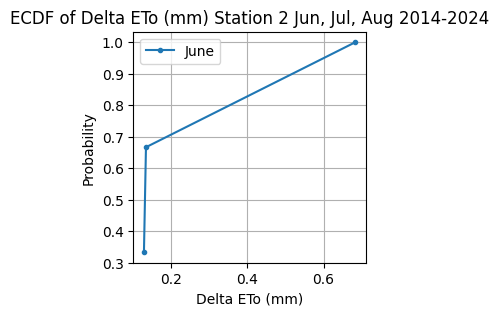

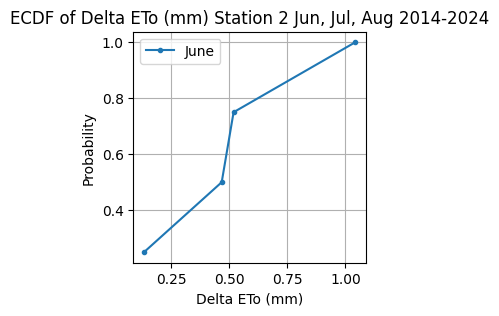

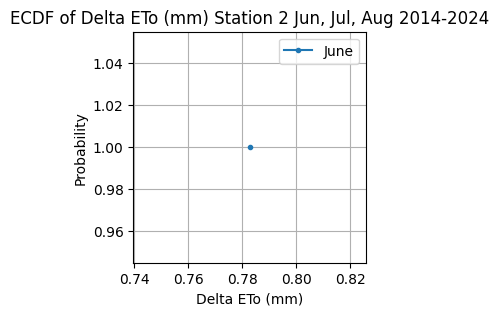

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from statsmodels.distributions.empirical_distribution import ECDF

# station_ids = [2]

# for id in station_ids:
#   dir = "/content/CIMIS/CIMIS_Project_Data/CIMIS_daily_corr_data/"
#   file = f'station_id{id}_cimis_daily_corr.csv'
#   df = pd.read_csv(f'{dir}{file}')
#   df['Date'] = pd.to_datetime(df.Date)
#   df.set_index(pd.to_datetime(df.Date),inplace=True)

#   df = df[(df['Date'].dt.month == 6) | (df['Date'].dt.month == 7) | (df['Date'].dt.month == 8) & (df['Date'].dt.year >= 2014)]

#   months = [6,7,8]
#   names = ['June','July','August']
#   for month in months:
#     df_mon = df[(df['Date'].dt.month == month)]
#     df_mon = df_mon.dropna()
#     ecdf = ECDF(df_mon['d_ETo'])
#     print(df_mon['d_ETo'].max())
#  #   plt.xlim(-0.1, 2.6)
# #    plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5])
#     plt.figure(figsize=(3,3))
#     plt.plot(ecdf.x, ecdf.y, marker='.', linestyle='-')
#     print(ecdf.y.max())
#     print(ecdf.x.max())
#     plt.xlabel('Delta ETo (mm)')
#     plt.ylabel('Probability')
#     plt.title(f'ECDF of Delta ETo (mm) Station {id} Jun, Jul, Aug 2014-2024')
#     plt.grid(True)
#     plt.legend(names)
#     #plt.tight_layout()
#     # plt.savefig()



(660, 59)
(542, 59)
2.879225264521904
(661, 59)
(530, 59)
1.7502039292077107
(310, 59)
(253, 59)
1.6879192401058782


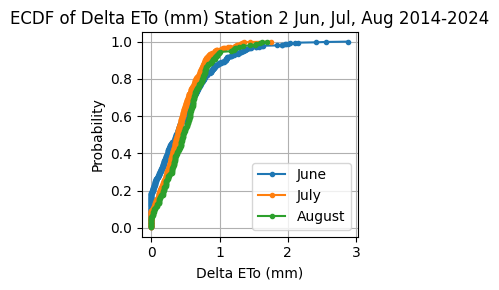

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

station_ids = [2]

for id in station_ids:
  dir = "/content/CIMIS/CIMIS_Project_Data/CIMIS_daily_corr_data/"
  file = f'station_id{id}_cimis_daily_corr.csv'
  df = pd.read_csv(f'{dir}{file}')
  df['Date'] = pd.to_datetime(df.Date)
  df.set_index(pd.to_datetime(df.Date),inplace=True)

  df = df[(df['Date'].dt.month == 6) | (df['Date'].dt.month == 7) | (df['Date'].dt.month == 8) & (df['Date'].dt.year >= 2014)]

  months = [6,7,8]
  names = ['June','July','August']
  plt.figure(figsize=(3,3))
  for month in months:
    df_mon = df[(df['Date'].dt.month == month)]
    print(df_mon.shape)
    df_mon = df_mon.dropna(subset=['d_ETo'])
    print(df_mon.shape)
    ecdf = ECDF(df_mon['d_ETo'])
    print(df_mon['d_ETo'].max())
#    plt.xlim(-0.1, 2.6)
#    plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5])

    plt.plot(ecdf.x, ecdf.y, marker='.', linestyle='-')
    plt.xlabel('Delta ETo (mm)')
    plt.ylabel('Probability')
    plt.title(f'ECDF of Delta ETo (mm) Station {id} Jun, Jul, Aug 2014-2024')
    plt.grid(True)
    plt.legend(names)
    plt.tight_layout()
    # plt.savefig()



(960, 59)
(737, 59)
2.55389857915055


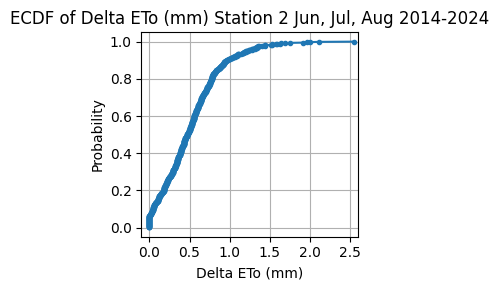

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

station_ids = [2, 6, 7, 12, 13, 15, 35, 39, 41, 43, 44, 47, 52, 64, 68, 70, 71, 75, 77, 78, 80, 83, 84, 87, 90, 91, 99, 104, 105, 106, 107, 113, 114, 117, 124, 125, 126, 129, 131, 140, 144, 146, 147, 150, 151, 152, 153, 157, 158, 160, 163, 165, 170, 171, 173, 174, 175, 178, 179, 181, 182, 184, 187, 191, 192, 193, 194, 195, 197, 199, 200, 202, 204, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 225, 226, 227, 228, 229, 235, 236, 237, 240, 241, 242, 243, 244, 245, 247, 248, 249, 250, 251, 252, 253, 254, 256, 258, 259, 260, 261, 262, 264, 265, 266, 267, 268]

for id in station_ids:
  dir = "/content/CIMIS/CIMIS_Project_Data/CIMIS_daily_corr_data/"
  file = f'station_id{id}_cimis_daily_corr.csv'
  df = pd.read_csv(f'{dir}{file}')
  df['Date'] = pd.to_datetime(df.Date)
  df.set_index(pd.to_datetime(df.Date),inplace=True)

  df = df[((df['Date'].dt.month == 6) | (df['Date'].dt.month == 7) | (df['Date'].dt.month == 8)) & (df['Date'].dt.year >= 2014)]

  plt.figure(figsize=(3,3))

  print(df.shape)
  df = df.dropna(subset=['d_ETo'])
  print(df.shape)
  ecdf = ECDF(df['d_ETo'])
  print(df['d_ETo'].max())
  plt.xlim(-0.1, 2.6)
  plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5])

  plt.plot(ecdf.x, ecdf.y, marker='.', linestyle='-')
  plt.xlabel('Delta ETo (mm)')
  plt.ylabel('Probability')
  plt.title(f'ECDF of Delta ETo (mm) Station {id} Jun, Jul, Aug 2014-2024')
  plt.grid(True)
#  plt.legend(names)
  plt.tight_layout()
  plt.savefig(f'/content/CIMIS/graphs/ecdf_jja/10yr/station_{id}_10yr.png')



(92, 59)
(72, 59)
1.6879192401058782


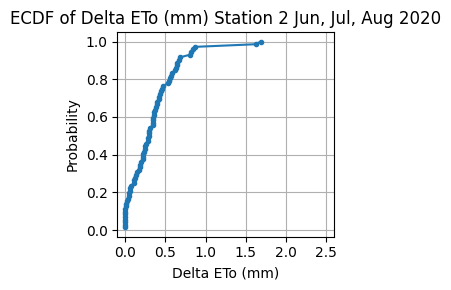

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

station_ids = [2]

for id in station_ids:
  dir = "/content/CIMIS/CIMIS_Project_Data/CIMIS_daily_corr_data/"
  file = f'station_id{id}_cimis_daily_corr.csv'
  df = pd.read_csv(f'{dir}{file}')
  df['Date'] = pd.to_datetime(df.Date)
  df.set_index(pd.to_datetime(df.Date),inplace=True)

  df = df[((df['Date'].dt.month == 6) | (df['Date'].dt.month == 7) | (df['Date'].dt.month == 8)) & (df['Date'].dt.year == 2020)]

  months = [6,7,8]
  names = ['June','July','August']
  plt.figure(figsize=(3,3))


  print(df.shape)
  df = df.dropna(subset=['d_ETo'])
  print(df.shape)
  ecdf = ECDF(df['d_ETo'])
  print(df['d_ETo'].max())
  plt.xlim(-0.1, 2.6)
  plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5])

  plt.plot(ecdf.x, ecdf.y, marker='.', linestyle='-')
  plt.xlabel('Delta ETo (mm)')
  plt.ylabel('Probability')
  plt.title(f'ECDF of Delta ETo (mm) Station {id} Jun, Jul, Aug 2020')
  plt.grid(True)
#  plt.legend(names)
  plt.tight_layout()
  # plt.savefig()



(68, 59)
1.527455030307256
(77, 59)
1.595209021178519
(63, 59)
2.109445872617111
(80, 59)
1.439133597281284
(66, 59)
1.7502039292077107
(32, 59)
1.1913741293002742
(72, 59)
1.6879192401058782
(82, 59)
2.005197626948263
(81, 59)
1.579585776774605
(85, 59)
0.7206459437791741
(31, 59)
2.55389857915055


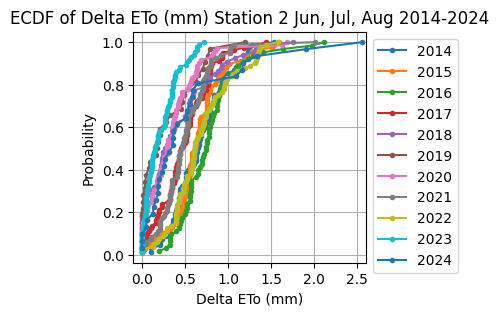

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

station_ids = [2]

for id in station_ids:
  dir = "/content/CIMIS/CIMIS_Project_Data/CIMIS_daily_corr_data/"
  file = f'station_id{id}_cimis_daily_corr.csv'
  df = pd.read_csv(f'{dir}{file}')
  df['Date'] = pd.to_datetime(df.Date)
  df.set_index(pd.to_datetime(df.Date),inplace=True)

  df = df[((df['Date'].dt.month == 6) | (df['Date'].dt.month == 7) | (df['Date'].dt.month == 8)) & (df['Date'].dt.year >= 2014)]

  years = list(range(2014,2025))
  plt.figure(figsize=(3,3))
  for year in years:
    df_yr = df[(df['Date'].dt.year == year)]
    df_yr = df_yr.dropna(subset=['d_ETo'])
    print(df_yr.shape)
    ecdf = ECDF(df_yr['d_ETo'])
    print(df_yr['d_ETo'].max())
    plt.xlim(-0.1, 2.6)
    plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5])

    plt.plot(ecdf.x, ecdf.y, marker='.', linestyle='-')
    plt.xlabel('Delta ETo (mm)')
    plt.ylabel('Probability')
    plt.title(f'ECDF of Delta ETo (mm) Station {id} Jun, Jul, Aug 2014-2024')
    plt.grid(True)
    plt.legend(years, bbox_to_anchor=(1, 1))
#    plt.tight_layout()
    # plt.savefig()



This plot is for Station 2, "Five Points", and it includes the years with minimum and maximum CDF values.

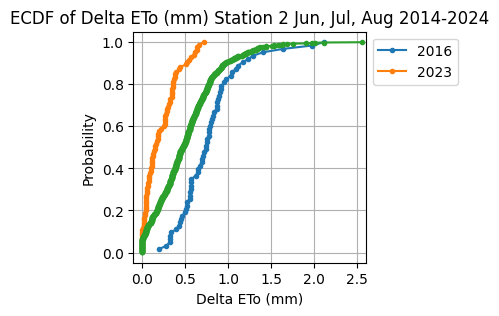

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

station_ids = [2]

for id in station_ids:
  dir = "/content/CIMIS/CIMIS_Project_Data/CIMIS_daily_corr_data/"
  file = f'station_id{id}_cimis_daily_corr.csv'
  df = pd.read_csv(f'{dir}{file}')
  df['Date'] = pd.to_datetime(df.Date)
  df.set_index(pd.to_datetime(df.Date),inplace=True)

  df = df[((df['Date'].dt.month == 6) | (df['Date'].dt.month == 7) | (df['Date'].dt.month == 8)) & (df['Date'].dt.year >= 2014)]

#  years = list(range(2024,2025))
  df = df.dropna(subset=['d_ETo'])
  #print(df.shape)
  ecdf_whole = ECDF(df['d_ETo'])

  years = [2016,2023]
  plt.figure(figsize=(3,3))
  for year in years:
    df_yr = df[(df['Date'].dt.year == year)]
    df_yr = df_yr.dropna(subset=['d_ETo'])
    #print(df_yr.shape)
    ecdf = ECDF(df_yr['d_ETo'])
    #print(df_yr['d_ETo'].max())
    plt.xlim(-0.1, 2.6)
    plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5])

    plt.plot(ecdf.x, ecdf.y, marker='.', linestyle='-')
    #plt.plot(ecdf_whole.x, ecdf_whole.y, marker='.', linestyle='-')
    plt.xlabel('Delta ETo (mm)')
    plt.ylabel('Probability')
    plt.title(f'ECDF of Delta ETo (mm) Station {id} Jun, Jul, Aug 2014-2024')
    plt.grid(True)
    plt.legend(years, bbox_to_anchor=(1, 1))
  plt.plot(ecdf_whole.x, ecdf_whole.y, marker='.', linestyle='-')
  plt.tight_layout()
#  plt.savefig()

